# Weekly assignment 2

## Read before you start

* Provide clear and complete answers in code blocks or markdown. You may add as many as you need.
* Always motivate your answers. This can be done in markdown cells, or in comments in code.
* Submit your results via Brightspace. Use the following filename convention: ``StudentName1_snumber1_StudentName2_snumber2_Assignment2.ipynb``.
* Make sure you submit a fully executed version of the notebook file. The teaching assistants will not run/debug your code during grading.
* Questions? Ask them during the workgroups, or see Brightspace for instructions on how to proceed.

## Belief updating

A researcher is doing a study into voting behaviour. They conduct a poll and ask people on the street whether they have voted at the latest elections.

After a day of collecting data, the researcher finds that $z=113$ out of $N=145$ people (claimed to) vote. These data inform the _likelihood_, which is a binomial distribution (Note: the product of Bernoulli's as shown in the lecture is very similar to the binomial distribution. The binomial distribution does not care about the _order_ in which people voted yes/no, which implies the binomial coefficient $\binom{N}{z}$):

$$ p(z\mid N, \theta) = \binom{N}{z} \theta^z (1-\theta)^{N-z} $$

Assume that the researcher started with a completely uniform _prior belief_ over the voting probability $\theta$. They represent this belief with a beta distribution (see the slides from Lecture 2).

1. What settings for $a$ and $b$ are appropriate here?

The researcher can easily update their beliefs about $\theta$, because the beta distribution is __conjugate__ to the binomial likelihood as well! However, that is easy for me to say...

2. Show that the posterior distribution for a beta prior and binomial likelihood is once more a beta distribution. What is the posterior distribution after combining the prior and the likelihood, for the settings of $a$ and $b$ you motivated in question 1, and the observations as given above?

3. Make a plot with $\theta \in [0,1]$ on the horizontal axis. Show the prior $p(\theta\mid a, b)$, with the settings for $a$ and $b$ as you chose in question 1, as well as the posterior $p(\theta\mid a, b, z, N)$ that you determined in question 2. You can use ``scipy.stats.beta.pdf()`` as an easy way to get the beta probability density function.

4. Use the function ``hdi()`` in the code block below to compute the 95% highest posterior density. What is the HDI? Superimpose this interval on your plot using ``plt.axvspan(..., alpha=0.1)``.

1.  The beta distribution B(1, 1) gives a uniform prior. Due to it giving a straightline as graph, which means all probabilities are equally likely.

2.  a = 1<br>
    b = 1<br>
    Binomial likelihood and beta-prior:<br>
    p(θ ∣ N, z, a, b)= p(z ∣ N, θ)p(θ ∣ a, b) / ∫p( z ∣ N, θ)p(θ ∣ a, b) dθ<br>
    <br>
    Combine the terms:<br>
    Binomial likelihood: p(z ∣ N, θ)= θ^z(1−θ)^N−z   <br>
    the beta prior: p(θ ∣ a, b)= θ^a−1 (1−θ)^b−1 / B(a, b)<br>
<br>
    p(θ ∣ N, z, a, b)= θ^z(1-θ)^N-z * (θ^a−1 (1−θ)^b−1 / B(a, b)) / ∫ θ^z(1-θ)^N-z * (θ^a−1 (1−θ)^b−1 / B(a, b))dθ<br>
<br>
    Combine the exponents of θ and (1-θ) and recognize the beta distribution<br>
    p(θ∣N,z,a,b)= θ^z+a−1(1−θ)^N−z+b−1 / ​∫ θ^z+a−1(1−θ)^N−z+b−1 dθ<br>
   <br>
    This leads us to the beta distribution:<br>
    Beta(θ | z + a, N − z + b)<br>
<br>
    given that z = 113 and N = 145 --> p(θ∣N,z,a,b)=Beta(θ∣a+113,b+145−113)   =  p(θ∣N,z,a,b)=Beta(θ∣a+113,b+32)
3.  
    

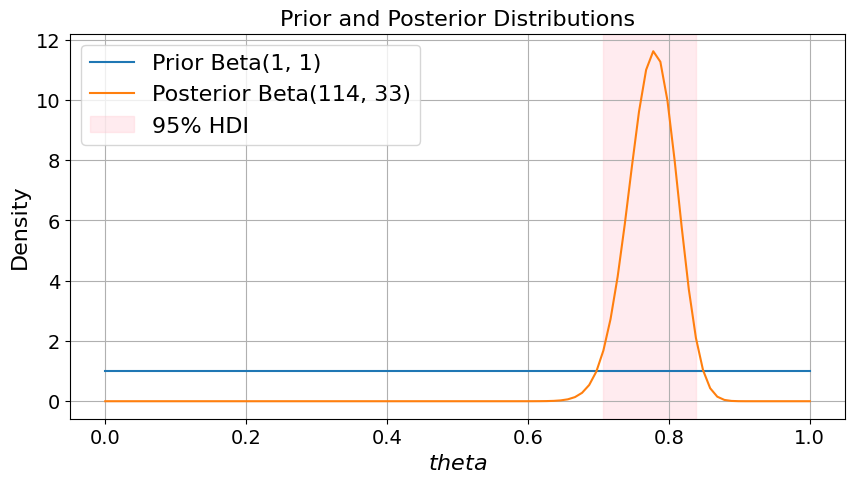

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

plt.rc('font', size=14)         # default fontsize
plt.rc('axes', titlesize=16)    # fontsize of the axes title
plt.rc('axes', labelsize=16)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=14)   # fontsize of the tick labels
plt.rc('ytick', labelsize=14)   # fontsize of the tick labels
plt.rc('legend', fontsize=16)   # legend fontsize
plt.rc('figure', titlesize=16)  # fontsize of the figure title
plt.rc('figure', titlesize=16)  # fontsize of the figure title

a_prior = 1  # The 'a' parameter for the prior distribution
b_prior = 1  # The 'b' parameter for the prior distribution
z = 113      # The number of successes
N = 145      # The total number of trials

theta = np.linspace(0, 1, num=100)

a_post = z + a_prior
b_post = N - z + b_prior

prior_pdf = stats.beta.pdf(theta, a_prior, b_prior)
posterior_pdf = stats.beta.pdf(theta, a_post, b_post)

plt.figure(figsize=(10, 5))
plt.plot(theta, prior_pdf, label=f'Prior Beta({a_prior}, {b_prior})')
plt.plot(theta, posterior_pdf, label=f'Posterior Beta({a_post}, {b_post})')

def hdi(theta, pdf, level=0.95):
    sorted_p = np.sort(pdf)[::-1]
    HDI_height = sorted_p[np.cumsum(sorted_p) >= level*sum(sorted_p)][0]    
    HDI = theta[pdf >= HDI_height]
    # Return bounds of the HDI:
    return HDI[0], HDI[-1]

hdi_var = hdi(theta, posterior_pdf)
plt.axvspan(hdi_var[0], hdi_var[1], color='pink', alpha=0.3, label='95% HDI')

plt.xlabel('$theta$')
plt.ylabel('Density')
plt.title('Prior and Posterior Distributions')
plt.legend()
plt.grid(True)
plt.show()

A year later, the researcher repeats the experiment. But rather than starting with a uniform prior belief again, they use the results from the previous experiment as an _informed prior_. This second experiments results in $z_2 = 84, N_2 = 129$.

5. Use the posterior as prior for this new experiment. What is the new posterior when taking your initial prior, the previous experiment, and the current experiment into account?

6. Plot the new posterior on top of your previous figure. What is the new 95% HDI? Is this smaller or wider than the previous one? Why?

5.  In the first expirement we had values: <br>
    a = b = 1 and z = 113 and N = 145 <br>   
    a'= 114 and b'= 146 <br>
    In the second expirement the new values are: <br>
    z2 = 84 and N2 = 129 <br>
    a'new = a' + z2 = 114 + 84 <br>
    b'new = b' + N2 - z2 = 33 + 129 - 84 <br>
6. 

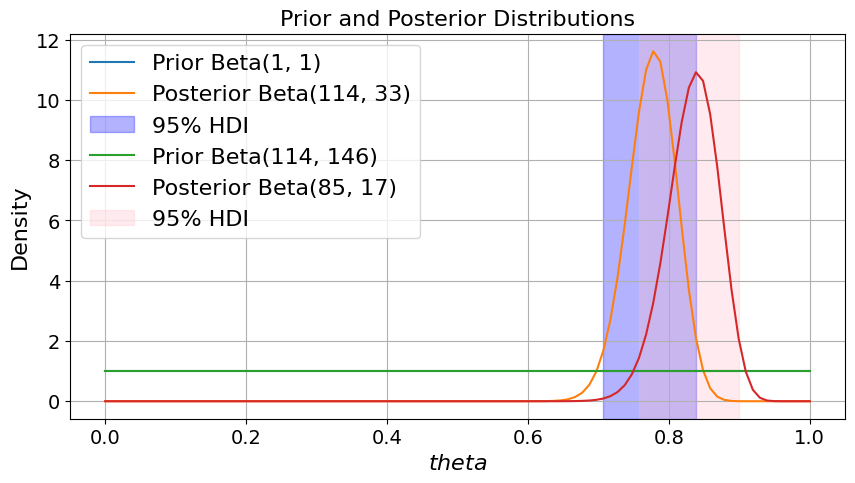

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

plt.rc('font', size=14)         # default fontsize
plt.rc('axes', titlesize=16)    # fontsize of the axes title
plt.rc('axes', labelsize=16)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=14)   # fontsize of the tick labels
plt.rc('ytick', labelsize=14)   # fontsize of the tick labels
plt.rc('legend', fontsize=16)   # legend fontsize
plt.rc('figure', titlesize=16)  # fontsize of the figure title
plt.rc('figure', titlesize=16)  # fontsize of the figure title
a_prior = 1  # The 'a' parameter for the prior distribution
b_prior = 1  # The 'b' parameter for the prior distribution
z = 113      # The number of successes
N = 145      # The total number of trials

theta = np.linspace(0, 1, num=100)

a_post = z + a_prior
b_post = N - z + b_prior

prior_pdf = stats.beta.pdf(theta, a_prior, b_prior)
posterior_pdf = stats.beta.pdf(theta, a_post, b_post)

plt.figure(figsize=(10, 5))
plt.plot(theta, prior_pdf, label=f'Prior Beta({a_prior}, {b_prior})')
plt.plot(theta, posterior_pdf, label=f'Posterior Beta({a_post}, {b_post})')

hdi_var = hdi(theta, posterior_pdf)
plt.axvspan(hdi_var[0], hdi_var[1], color='blue', alpha=0.3, label='95% HDI')
a_prior_updated = 114  # The 'a' parameter for the updated prior
b_prior_updated = 146  # The 'b' parameter for the updated prior
z2 = 84  # The number of successes in the second experiment
N2 = 129  # The total number of trials in the second experiment

theta = np.linspace(0, 1, num=100)

a_post = z2 + a_prior
b_post = N2 - z + b_prior

prior_pdf = stats.beta.pdf(theta, a_prior, b_prior)
posterior_pdf = stats.beta.pdf(theta, a_post, b_post)

plt.plot(theta, prior_pdf, label=f'Prior Beta({a_prior_updated}, {b_prior_updated})')
plt.plot(theta, posterior_pdf, label=f'Posterior Beta({a_post}, {b_post})')

def hdi(theta, pdf, level=0.95):
    sorted_p = np.sort(pdf)[::-1]
    HDI_height = sorted_p[np.cumsum(sorted_p) >= level*sum(sorted_p)][0]    
    HDI = theta[pdf >= HDI_height]
    # Return bounds of the HDI:
    return HDI[0], HDI[-1]

hdi_var = hdi(theta, posterior_pdf)
plt.axvspan(hdi_var[0], hdi_var[1], color='pink', alpha=0.3, label='95% HDI')

plt.xlabel('$theta$')
plt.ylabel('Density')
plt.title('Prior and Posterior Distributions')
plt.legend()
plt.grid(True)
plt.show()

## More on conjugacy

Consider once more our favorite theorem:

$$ p(\theta\mid D) = \frac{p(D\mid \theta)p(\theta)}{p(D)} \enspace$$

As we saw in the lecture, if the prior $p(\theta)$ is conjugate to the likelihood $p(D\mid\theta)$, we are in luck: in that case the posterior $p(\theta\mid D)$ has the same form as the prior, just with updated parameters. But that is not all! In the conjugate case, we also have an analytic solution for the _evidence_ (a.k.a. _marginal likelihood_) $P(D)=\int p(D\mid \theta)p(\theta) \text{d}\theta$. That means if we want to do something with $p(D)$, we do not have to use a pesky integral (and later in the course we will see that $p(D)$ has important uses).

Let's assume once more the binomial likelihood:

$$ p(z\mid \theta, N) = \binom{N}{z} \theta^{z} (1-\theta)^{N-z} $$

and the beta prior:

$$ p(\theta \mid a, b) = \frac{\theta^{a-1}(1-\theta)^{b-1})}{B(a,b)} \enspace.$$

Prove that
$$ p(z\mid N, a,b) = \binom{N}{z}\frac{B(z+a, N-z+b)}{B(a,b)} \enspace.$$

Note: if you are using a lot of calculus to get to the result, you are doing it wrong! You only have to expand the expressions for prior and likelihood and look carefully for terms that you recognize / know the solution for.

Proof:
    Binomial likelihood and beta-prior:<br>
    p(θ ∣ N, z, a, b)= p(z ∣ N, θ)p(θ ∣ a, b) / ∫p( z ∣ N, θ)p(θ ∣ a, b) dθ<br>
    <br>
    Combine the terms:<br>
    Binomial likelihood: p(z ∣ N, θ)= θ^z(1−θ)^N−z   <br>
    the beta prior: p(θ ∣ a, b)= θ^a−1 (1−θ)^b−1 / B(a, b)<br>
<br>
    p(θ ∣ N, z, a, b)= θ^z(1-θ)^N-z * (θ^a−1 (1−θ)^b−1 / B(a, b)) / ∫ θ^z(1-θ)^N-z * (θ^a−1 (1−θ)^b−1 / B(a, b))dθ<br>
    This equals:<br>
    p(θ ∣ N, z, a, b)= θ^z(1-θ)^N-z * (θ^a−1 (1−θ)^b−1 / B(a, b)) / B(a, b)<br>
    p(θ ∣ N, z, a, b)= B(z + a, N - z + b) / B(a, b)<br>

## Conjugacy with other distributions

So far we have looked at the beta distribution, as well as the binomial and product-of-Bernoullis (the latter two being very similar). But of course, conjugacy is not restricted to these distributions -- there are many more examples.

For this exercise, we'll consider the *Poisson distribution*. It describes how often some rare event occurred within a specified time frame (e.g., the number of days of rain in the Sahara dessert, in the span of a year). The Poisson distribution assigns a probability to an observation $k$ (a discrete number) given parameter $\lambda$ (a continuous number, indicating the rate at which these events happen) according to the following probability distribution:

$$ p(k \mid  \lambda) = \mathrm{Poisson}(k\mid \lambda)= \frac{e^{-\lambda} \lambda^k}{k!} \enspace. $$

This is important: $k$ is observed, $\lambda$ is a parameter that we wish to learn, using that data. The parameter tells us for example what the rate of rain in the Sahara is.

1. For this question, let's pick $\lambda=5$. Make a plot of the probability distribution $p(k\mid \lambda=5)$ for $k=0,\ldots, 20$. Remember that $k$ is integer here, so it makes more sense to use ``plt.bar()`` than ``plt.plot()`` as you did for continuous numbers. You can use ``scipy.stats.poisson.pmf`` to easily compute the Poisson probabilities.

2. If you sum the probabilities you computed in the previous question over the different values for $k$, the result is (approximately) 1. Why is this the case?

2.  In any probability distribution, the sum of the probabilities of all possible outcomes must equal 1. This is a fundamental property called the axiom of probability.

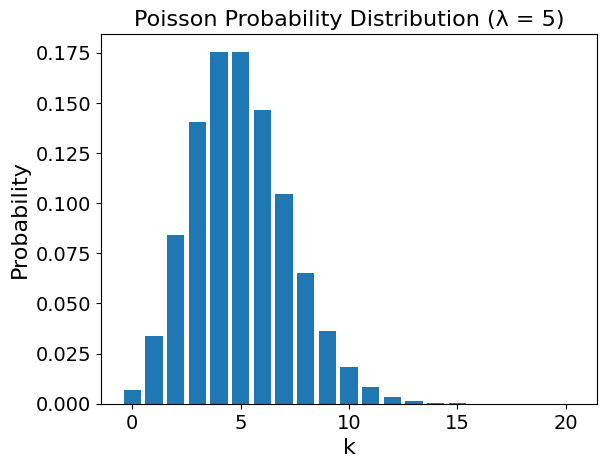

In [3]:
import numpy as np
from scipy.stats import poisson
import matplotlib.pyplot as plt

lambda_given = 5
k_values = np.arange(0, 21)

poisson_probs = poisson.pmf(k_values, lambda_given)

plt.bar(k_values, poisson_probs)
plt.xlabel('k')
plt.ylabel('Probability')
plt.title('Poisson Probability Distribution (λ = 5)')
plt.show()

lambda_given = 5
lambda_range = np.linspace(0, 20, num=100)

Of course, there exists a probability distribution that is conjugate to the Poisson distribution. This one is known as the _gamma_ distribution. It has this form:

$$ p(\lambda \mid  \alpha, \beta) = \mathrm{Gamma}(\lambda\mid \alpha, \beta) = \frac{\beta^\alpha}{\Gamma(\alpha)} \lambda^{\alpha-1} e^{-\beta\lambda} \enspace, $$

with two *hyperparameters*, $\alpha$ and $\beta$.

3. Which part of this probability density function is the normalization, i.e. the part that ensures the distribution integrates to 1?

4. Show that indeed the gamma prior is conjugate to the Poisson likelihood. That is, compute the posterior and show that it has exactly the gamma distribution form, but that $\alpha$ and $\beta$ have been updated.

Now let's set $\alpha=5$ and $\beta=2$ to determine our prior belief about $\lambda$. Furthermore, assume we observe $k=8$.

5. Make a figure that shows (in three different ``plt.subplots(nrows=1, ncols=3, sharex=True)`` the prior in the left subplot, the likelihood in the middle subplot, and the posterior in the right subplot. All plots should have $\lambda \in [0, 20]$ on the horizontal axis. Since $\lambda$ is a continuous variable, it makes sense to use ``plt.plot()`` again (or ``ax.plot()`` since we are working with subplots, see below). You can use ``scipy.stats.gamma.pdf()`` to compute the gamma probability density function. Note: call the SciPy gamma function as: ``scipy.stats.gamma.pdf(lambda, alpha, scale=1/beta)`` or your results will not make sense!

3.  The normalization part is the denominator it acts as a normalizing constant which ensures that the integral of the gamma distribution's pdf over it's domain 0 -> infinity equals 1. This is necessary because the pdf must satisfy the property that the total probability is 1 when integrated over all possible values of λ.    

4.  To show that the gamma prior is the conjugate to the poisson likelihood, we try to follow the same step by step process as done with the beta prior and binomial likelihood.<br>
p(k | lambda) = Poisson(k | lambda) = e^-lambda * lambda^k / k! <br>
gamma prior:<br>
p(lambda | a, b) = Gamma(lambda | a, b) = b^a * lambda^a-1 * e^b*lambda / Γ(a) <br>
posterior distribution taken with Bayes' theorem:<br>
p(lambda | k, a, b) = p(k | lambda)p(lambda | a, b) / ​∫ p(k | lambda)p(lambda | a, b) d lambda <br>
insert the expressions:
p(lambda | k, a, b) = ((e^-lambda * lambda^k)/k!)((b^a * lambda^a-1 * e^-b*lambda)/ Γ(a)) / ​∫ ((e^-lambda * lambda^k)/k!)((b^a * lambda^a-1 * e^-b*lambda)/ Γ(a)) d lambda <br>
Now we can simplify the function by combining the terms with lambda and e and canceling out the terms that don't depend on lambda which results in:<br>
p(lambda | k, a, b) ∝ lambda^k+a-1 e^-lambda(b+1)<br>
Now we can take the gamma distribution out of this fraction: <br>
p(lambda | k, a, b) = Gamma(lambda | k+a, b+1)

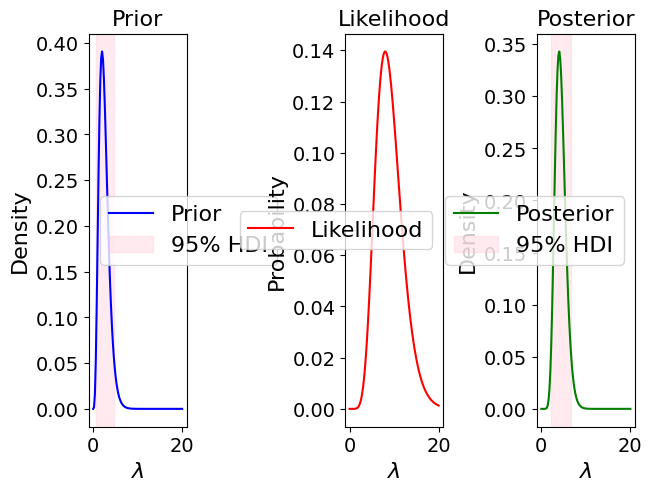

In [4]:
import numpy as np
from scipy.stats import gamma, poisson
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=1, ncols=3, sharex=True, constrained_layout=True)
lambda_range = np.linspace(0, 20, num=100)

a = 5
b = 2
k = 8

prior_pdf = gamma.pdf(lambda_range, a, scale=1/b)
likelihood = poisson.pmf(k, lambda_range)
posterior_pdf = gamma.pdf(lambda_range, a + k, scale=1/(b+1))

axes[0].plot(lambda_range, prior_pdf, label='Prior', color='blue')
axes[0].set_title('Prior')
axes[0].set_xlabel('$\lambda$')
axes[0].set_ylabel('Density')

axes[1].plot(lambda_range, likelihood, label='Likelihood',  color='red')
axes[1].set_title('Likelihood')
axes[1].set_xlabel('$\lambda$')
axes[1].set_ylabel('Probability')

axes[2].plot(lambda_range, posterior_pdf, label='Posterior', color='green')
axes[2].set_title('Posterior')
axes[2].set_xlabel('$\lambda$')
axes[2].set_ylabel('Density')

def hdi(theta, pdf, level=0.95):
    sorted_p = np.sort(pdf)[::-1]
    HDI_height = sorted_p[np.cumsum(sorted_p) >= level*sum(sorted_p)][0]    
    HDI = theta[pdf >= HDI_height]
    # Return bounds of the HDI:
    return HDI[0], HDI[-1]

hdi_var_prior = hdi(lambda_range, prior_pdf)
hdi_var_posterior = hdi(lambda_range, posterior_pdf)

axes[0].axvspan(hdi_var_prior[0], hdi_var_prior[1], color='pink', alpha=0.3, label='95% HDI')
axes[2].axvspan(hdi_var_posterior[0], hdi_var_posterior[1], color='pink', alpha=0.3, label='95% HDI')

axes[0].legend()
axes[1].legend()
axes[2].legend()

plt.show()


6. Compute the 95% HDI of $\lambda$ for the prior and for the posterior and superimpose it on the corresponding plots using ``ax.axvspan()``. How has it changed?

7. Why does the likelihood in the middle plot __not__ integrate to 1?

6.  The position of the HDI has changed, at the posterior the HDI starts at a higher value than the prior. This means that after we have observed and incorporated new data, our estimate for the rate parameterlambda has increased. The data that was collected implies that the event that was studied happens more frequently than initially thought.<br>
    
7.  The likelihood function quantifies the plausibility of parameters given observed data and is not required to integrate to 1 because it is not a probability distribution over the parameter space.